# QRT ENS Data Challenge 2023 - Benchmark (english)

This notebook details the benchmark construction for the challenge - it may also help participants to start the competition.

## Libraries

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

- `X_train` and `X_test` both have $35$ columns that represent the same explanatory variables but over different time periods.

- `X_train` and `Y_train` share the same column `ID` - each row corresponds to a unique ID associated wwith a day and a country.

- The target of this challenge `TARGET` in `Y_train` corresponds to the price change for daily futures contracts of 24H electricity baseload.

- **You will notice some columns have missing values**.


In [2]:
# After downloading the X_train/X_test/Y_train .csv files in your working directory:

X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

In [3]:
X_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


In [4]:
Y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


## Null Value check

In [5]:
Y_train.shape

(1494, 2)

In [6]:
def print_null_values(df, name):
    print(f"Null values in {name}:")
    null_counts = df.isnull().sum()
    for column, count in null_counts.iteritems():
        print(f"{column}: {count}")
    print("\n")  # Print a newline for better readability

# Print the null values for each dataset
print_null_values(X_train, 'X_train')
print_null_values(Y_train, 'Y_train')
print_null_values(X_test, 'X_test')


Null values in X_train:
ID: 0
DAY_ID: 0
COUNTRY: 0
DE_CONSUMPTION: 0
FR_CONSUMPTION: 0
DE_FR_EXCHANGE: 25
FR_DE_EXCHANGE: 25
DE_NET_EXPORT: 124
FR_NET_EXPORT: 70
DE_NET_IMPORT: 124
FR_NET_IMPORT: 70
DE_GAS: 0
FR_GAS: 0
DE_COAL: 0
FR_COAL: 0
DE_HYDRO: 0
FR_HYDRO: 0
DE_NUCLEAR: 0
FR_NUCLEAR: 0
DE_SOLAR: 0
FR_SOLAR: 0
DE_WINDPOW: 0
FR_WINDPOW: 0
DE_LIGNITE: 0
DE_RESIDUAL_LOAD: 0
FR_RESIDUAL_LOAD: 0
DE_RAIN: 94
FR_RAIN: 94
DE_WIND: 94
FR_WIND: 94
DE_TEMP: 94
FR_TEMP: 94
GAS_RET: 0
COAL_RET: 0
CARBON_RET: 0


Null values in Y_train:
ID: 0
TARGET: 0


Null values in X_test:
ID: 0
DAY_ID: 0
COUNTRY: 0
DE_CONSUMPTION: 0
FR_CONSUMPTION: 0
DE_FR_EXCHANGE: 9
FR_DE_EXCHANGE: 9
DE_NET_EXPORT: 47
FR_NET_EXPORT: 24
DE_NET_IMPORT: 47
FR_NET_IMPORT: 24
DE_GAS: 0
FR_GAS: 0
DE_COAL: 0
FR_COAL: 0
DE_HYDRO: 0
FR_HYDRO: 0
DE_NUCLEAR: 0
FR_NUCLEAR: 0
DE_SOLAR: 0
FR_SOLAR: 0
DE_WINDPOW: 0
FR_WINDPOW: 0
DE_LIGNITE: 0
DE_RESIDUAL_LOAD: 0
FR_RESIDUAL_LOAD: 0
DE_RAIN: 40
FR_RAIN: 40
DE_WIND: 40
FR_WIND: 40
DE_TEM

<ipython-input-6-ea7f8f4d1cfe>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in null_counts.iteritems():
<ipython-input-6-ea7f8f4d1cfe>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in null_counts.iteritems():
<ipython-input-6-ea7f8f4d1cfe>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in null_counts.iteritems():


## Country distribution

<ipython-input-10-7333477455b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='COUNTRY', data=X_train, palette='coolwarm')


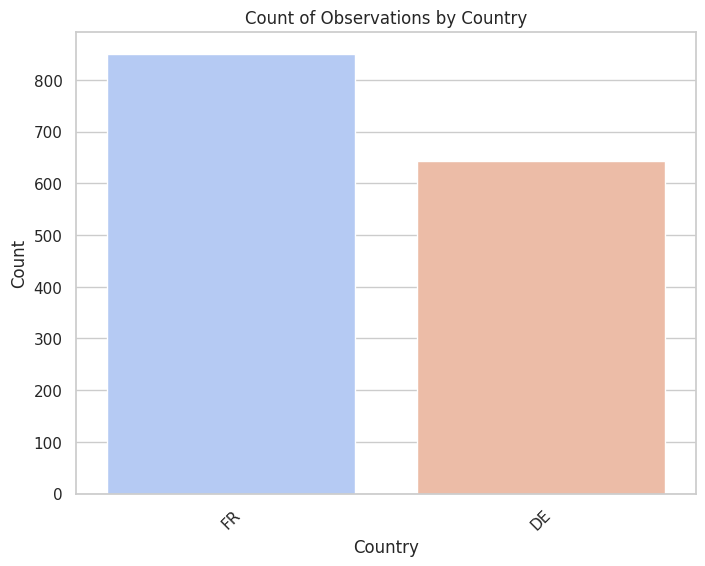

In [10]:
# Create a bar plot of country counts
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='COUNTRY', data=X_train, palette='coolwarm')

plt.title('Count of Observations by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if needed

plt.show()


In [11]:
# Group the data by 'COUNTRY' and calculate count, mean, median for selected features
grouped_by_country = X_train.groupby('COUNTRY').agg(['count', 'mean', 'median'])

# Selecting a subset of features for demonstration. You can adjust this list as needed.
features_of_interest = ['DE_CONSUMPTION', 'FR_CONSUMPTION', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
                        'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_TEMP', 'FR_TEMP']

# Print the summary statistics for these features grouped by country
summary_by_country = grouped_by_country[features_of_interest]
print(summary_by_country)

        DE_CONSUMPTION                     FR_CONSUMPTION                      \
                 count      mean    median          count      mean    median   
COUNTRY                                                                         
DE                 643  0.379809  0.288112            643 -0.091154 -0.465141   
FR                 851  0.463432  0.410629            851  0.033707 -0.365601   

        DE_NET_EXPORT                     FR_NET_EXPORT  ... DE_WINDPOW  \
                count      mean    median         count  ...     median   
COUNTRY                                                  ...              
DE                643 -0.327798 -0.404441           643  ...  -0.078279   
FR                727 -0.193123 -0.244606           781  ...  -0.103101   

        FR_WINDPOW                     DE_TEMP                     FR_TEMP  \
             count      mean    median   count      mean    median   count   
COUNTRY                                                       

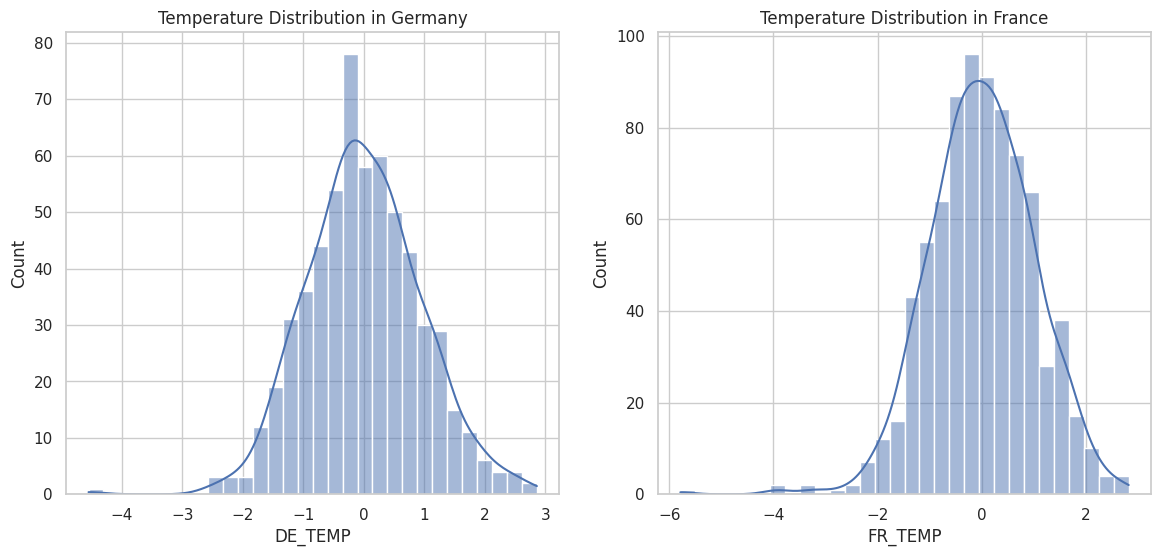

In [12]:
# Example: Plotting histograms for temperature in France and Germany
plt.figure(figsize=(14, 6))

# Temperature in Germany
plt.subplot(1, 2, 1)
sns.histplot(X_train[X_train['COUNTRY'] == 'DE']['DE_TEMP'], bins=30, kde=True)
plt.title('Temperature Distribution in Germany')

# Temperature in France
plt.subplot(1, 2, 2)
sns.histplot(X_train[X_train['COUNTRY'] == 'FR']['FR_TEMP'], bins=30, kde=True)
plt.title('Temperature Distribution in France')

plt.show()


In [13]:
# Group the data by 'COUNTRY' and then apply a lambda function to count null values for each column
null_values_by_country = X_train.groupby('COUNTRY').apply(lambda x: x.isnull().sum())


# Display the null value counts grouped by country
print(null_values_by_country)


         ID  DAY_ID  COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
COUNTRY                                                                        
DE        0       0        0               0               0               0   
FR        0       0        0               0               0              25   

         FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  ...  \
COUNTRY                                                               ...   
DE                    0              0              0              0  ...   
FR                   25            124             70            124  ...   

         FR_RESIDUAL_LOAD  DE_RAIN  FR_RAIN  DE_WIND  FR_WIND  DE_TEMP  \
COUNTRY                                                                  
DE                      0       47       47       47       47       47   
FR                      0       47       47       47       47       47   

         FR_TEMP  GAS_RET  COAL_RET  CARBON_RET  
COUNTRY                

In [14]:
# Identify rows with null values in weather-related columns for DE
null_de_temp = X_train[X_train['DE_TEMP'].isnull()]['DAY_ID']
null_de_rain = X_train[X_train['DE_RAIN'].isnull()]['DAY_ID']
null_de_wind = X_train[X_train['DE_WIND'].isnull()]['DAY_ID']

# Combine and get unique DAY_IDs for DE
null_de_days = pd.unique(null_de_temp.append(null_de_rain).append(null_de_wind))

# Identify rows with null values in weather-related columns for FR
null_fr_temp = X_train[X_train['FR_TEMP'].isnull()]['DAY_ID']
null_fr_rain = X_train[X_train['FR_RAIN'].isnull()]['DAY_ID']
null_fr_wind = X_train[X_train['FR_WIND'].isnull()]['DAY_ID']

# Combine and get unique DAY_IDs for FR
null_fr_days = pd.unique(null_fr_temp.append(null_fr_rain).append(null_fr_wind))

# Check if the DAY_IDs with null values are the same for DE and FR
common_null_days = set(null_de_days) & set(null_fr_days)

# Print the results
print(f"Number of days with nulls in DE: {len(null_de_days)}")
print(f"Number of days with nulls in FR: {len(null_fr_days)}")
print(f"Number of common days with nulls in DE and FR: {len(common_null_days)}")
print(f"Common DAY_IDs with nulls: {common_null_days}")


Number of days with nulls in DE: 47
Number of days with nulls in FR: 47
Number of common days with nulls in DE and FR: 47
Common DAY_IDs with nulls: {130, 387, 262, 775, 11, 1037, 783, 1044, 278, 535, 282, 155, 538, 27, 1052, 677, 678, 679, 424, 809, 557, 815, 304, 561, 689, 1207, 1213, 957, 832, 73, 74, 330, 336, 725, 1111, 345, 859, 96, 98, 355, 739, 497, 1011, 500, 887, 253, 767}


<ipython-input-14-c99a57f0fb2a>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  null_de_days = pd.unique(null_de_temp.append(null_de_rain).append(null_de_wind))
<ipython-input-14-c99a57f0fb2a>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  null_de_days = pd.unique(null_de_temp.append(null_de_rain).append(null_de_wind))
<ipython-input-14-c99a57f0fb2a>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  null_fr_days = pd.unique(null_fr_temp.append(null_fr_rain).append(null_fr_wind))
<ipython-input-14-c99a57f0fb2a>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  null_fr_days = pd.unique(null_fr_temp.append(null_fr_rain).append(null_

## Imputation

In [15]:
# List of weather-related columns that need imputation
weather_columns = ['DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP']

# Calculate the mean for each weather-related column by country and fill NaN values
for column in weather_columns:
    X_train[column] = X_train.groupby('COUNTRY')[column].transform(lambda x: x.fillna(x.mean()))


In [ ]:
print(X_train[weather_columns].isnull().sum())

DE_RAIN    0
FR_RAIN    0
DE_WIND    0
FR_WIND    0
DE_TEMP    0
FR_TEMP    0
dtype: int64


## Correlation Matrix

In [ ]:
# Assuming your dataset is loaded into a DataFrame called X_train
df_fr = X_train[X_train['COUNTRY'] == 'FR']
df_de = X_train[X_train['COUNTRY'] == 'DE']


In [ ]:
# Calculate the correlation matrices
corr_fr = df_fr.corr()
corr_de = df_de.corr()
corr_X_train = X_train.corr()


<ipython-input-43-3a9323595d31>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_fr = df_fr.corr()
<ipython-input-43-3a9323595d31>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_de = df_de.corr()
<ipython-input-43-3a9323595d31>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_X_train = X_train.corr()


In [ ]:
def get_top_correlations(corr_matrix, country_name, n=10):
    # Create a mask to ignore self-correlation
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix_masked = corr_matrix.mask(mask)

    # Stack the correlation matrix and reset its index to get pair of variables as a DataFrame
    corr_stack = corr_matrix_masked.stack().reset_index()
    corr_stack.columns = ['Variable 1', 'Variable 2', 'Correlation']

    # Calculate absolute correlation values for sorting
    corr_stack['Abs Correlation'] = corr_stack['Correlation'].abs()

    # Sort by absolute correlation and take top n values
    top_correlations = corr_stack.sort_values(by='Abs Correlation', ascending=False).head(n)

    print(f"Top {n} correlated pairs in {country_name}:")
    print(top_correlations[['Variable 1', 'Variable 2', 'Correlation']])
    print("\n")

# Apply the function to the correlation matrices for France and Germany
get_top_correlations(corr_fr, 'France')
get_top_correlations(corr_de, 'Germany')
get_top_correlations(corr_X_train, 'Full training data')

Top 10 correlated pairs in France:
           Variable 1      Variable 2  Correlation
34      DE_NET_IMPORT   DE_NET_EXPORT    -1.000000
14     FR_DE_EXCHANGE  DE_FR_EXCHANGE    -1.000000
43      FR_NET_IMPORT   FR_NET_EXPORT    -1.000000
279  FR_RESIDUAL_LOAD  FR_CONSUMPTION     0.967214
405           FR_WIND         DE_WIND     0.824854
5      FR_CONSUMPTION  DE_CONSUMPTION     0.817513
189          FR_SOLAR        DE_SOLAR     0.801795
287  FR_RESIDUAL_LOAD          FR_GAS     0.791884
58             FR_GAS  FR_CONSUMPTION     0.779585
278  FR_RESIDUAL_LOAD  DE_CONSUMPTION     0.764470


Top 10 correlated pairs in Germany:
           Variable 1      Variable 2  Correlation
34      DE_NET_IMPORT   DE_NET_EXPORT    -1.000000
14     FR_DE_EXCHANGE  DE_FR_EXCHANGE    -1.000000
43      FR_NET_IMPORT   FR_NET_EXPORT    -1.000000
279  FR_RESIDUAL_LOAD  FR_CONSUMPTION     0.961762
405           FR_WIND         DE_WIND     0.811393
287  FR_RESIDUAL_LOAD          FR_GAS     0.808915
5      FR

This shows us that there are pais in the data with perfect negative correslation and imples data redundancy. For our analysis we can choose to use only one value per pair from the set of pairs.

To calculate the 20 most correlated featues exculding the perfectly correlated ones the code to execute is below

In [ ]:
def get_top_correlations(corr_matrix, country_name, n=20):
    """
    This function prints the top n correlated pairs of variables for a given country,
    excluding perfect correlations (1 or -1).
    """
    # Mask to ignore the upper triangle and diagonal, thus excluding self-correlations
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix_masked = corr_matrix.mask(mask)

    # Stack the correlation matrix and reset its index to get pair of variables as a DataFrame
    corr_stack = corr_matrix_masked.stack().reset_index()
    corr_stack.columns = ['Variable 1', 'Variable 2', 'Correlation']

    # Exclude perfect correlations by filtering
    corr_stack_filtered = corr_stack[(corr_stack['Correlation'].abs() < 1)]

    # Calculate absolute correlation values for sorting
    corr_stack_filtered['Abs Correlation'] = corr_stack_filtered['Correlation'].abs()

    # Sort by absolute correlation and take top n values
    top_correlations = corr_stack_filtered.sort_values(by='Abs Correlation', ascending=False).head(n)

    print(f"Top {n} correlated pairs in {country_name}, excluding perfect correlations:")
    print(top_correlations[['Variable 1', 'Variable 2', 'Correlation']])
    print("\n")

# Apply the function to the correlation matrices for France and Germany
#get_top_correlations(corr_fr, 'France')
#get_top_correlations(corr_de, 'Germany')
get_top_correlations(corr_X_train, 'Full training Data')

Top 20 correlated pairs in Full training Data, excluding perfect correlations:
           Variable 1      Variable 2  Correlation
279  FR_RESIDUAL_LOAD  FR_CONSUMPTION     0.965086
405           FR_WIND         DE_WIND     0.820860
5      FR_CONSUMPTION  DE_CONSUMPTION     0.813202
189          FR_SOLAR        DE_SOLAR     0.803381
287  FR_RESIDUAL_LOAD          FR_GAS     0.795914
58             FR_GAS  FR_CONSUMPTION     0.779727
196        DE_WINDPOW   DE_NET_EXPORT     0.763398
198        DE_WINDPOW   DE_NET_IMPORT    -0.763398
278  FR_RESIDUAL_LOAD  DE_CONSUMPTION     0.754142
243        DE_LIGNITE         DE_COAL     0.725934
293  FR_RESIDUAL_LOAD      FR_NUCLEAR     0.717724
263  DE_RESIDUAL_LOAD          DE_GAS     0.715224
275  DE_RESIDUAL_LOAD      DE_LIGNITE     0.713916
273  DE_RESIDUAL_LOAD      DE_WINDPOW    -0.705836
139        FR_NUCLEAR  FR_CONSUMPTION     0.705734
20      DE_NET_EXPORT  FR_DE_EXCHANGE    -0.703962
32      DE_NET_IMPORT  DE_FR_EXCHANGE    -0.703962
33 

<ipython-input-45-6f436626aac1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_stack_filtered['Abs Correlation'] = corr_stack_filtered['Correlation'].abs()


In [ ]:
# Identify rows with null values in weather-related columns for DE
null_de_temp = X_train[X_train['DE_TEMP'].isnull()]['DAY_ID']
null_de_rain = X_train[X_train['DE_RAIN'].isnull()]['DAY_ID']
null_de_wind = X_train[X_train['DE_WIND'].isnull()]['DAY_ID']

# Combine and get unique DAY_IDs for DE
null_de_days = pd.unique(null_de_temp.append(null_de_rain).append(null_de_wind))

# Identify rows with null values in weather-related columns for FR
null_fr_temp = X_train[X_train['FR_TEMP'].isnull()]['DAY_ID']
null_fr_rain = X_train[X_train['FR_RAIN'].isnull()]['DAY_ID']
null_fr_wind = X_train[X_train['FR_WIND'].isnull()]['DAY_ID']

# Combine and get unique DAY_IDs for FR
null_fr_days = pd.unique(null_fr_temp.append(null_fr_rain).append(null_fr_wind))

# Check if the DAY_IDs with null values are the same for DE and FR
common_null_days = set(null_de_days) & set(null_fr_days)

# Print the results
print(f"Number of days with nulls in DE: {len(null_de_days)}")
print(f"Number of days with nulls in FR: {len(null_fr_days)}")
print(f"Number of common days with nulls in DE and FR: {len(common_null_days)}")
print(f"Common DAY_IDs with nulls: {common_null_days}")


## Model and train score

The benchark for this challenge consists in a simple linear regression, after a light cleaning of the data: The missing (NaN) values are simply filled with 0's and the `COUNTRY` column is dropped - namely we used the same model for France and Germany.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit the label encoder and transform the 'COUNTRY' column to numeric
X_train['COUNTRY'] = le.fit_transform(X_train['COUNTRY'])

# Now the 'COUNTRY' column is encoded, and you can see the mapping of countries to integers
country_mappings = {index: label for index, label in enumerate(le.classes_)}
print("Country mappings:", country_mappings)


Country mappings: {0: 'DE', 1: 'FR'}


In [ ]:
X_train = X_train.drop(['ID','DAY_ID'], axis=1)

In [ ]:
columns_to_drop = ['DE_NET_IMPORT', 'FR_NET_IMPORT', 'FR_DE_EXCHANGE']

# Drop these columns from your training data
X_train_dropped_columns = X_train.drop(columns=columns_to_drop)

In [ ]:
# model without cleaning the data

lr = LinearRegression()

X_train_clean = X_train.fillna(0)
Y_train_clean = Y_train['TARGET']

lr.fit(X_train_clean, Y_train_clean)

output_train = lr.predict(X_train_clean)

def metric_train(output):

    return  spearmanr(output, Y_train_clean).correlation

print('Spearman correlation for the train set: {:.1f}%'.format(100 * metric_train(output_train) ))

Spearman correlation for the train set: 27.9%


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from scipy.stats import spearmanr

In [ ]:
# Prepare the data
X_train_clean = X_train.fillna(0)
Y_train_clean = Y_train['TARGET']

# Initialize and fit the Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_reg.fit(X_train_clean, Y_train_clean)
output_train_ridge = ridge_reg.predict(X_train_clean)

# Initialize and fit the Lasso regression model
lasso_reg = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_reg.fit(X_train_clean, Y_train_clean)
output_train_lasso = lasso_reg.predict(X_train_clean)

# Initialize and fit the Elastic Net model
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio corresponds to the mix of L1/L2 regularization
elastic_net_reg.fit(X_train_clean, Y_train_clean)
output_train_elastic = elastic_net_reg.predict(X_train_clean)

# Function to calculate Spearman correlation
def metric_train(output, true_values):
    return spearmanr(output, true_values).correlation

# Print Spearman correlation for the train set for each model
print('Spearman correlation for the Ridge Regression train set: {:.1f}%'.format(100 * metric_train(output_train_ridge, Y_train_clean)))
print('Spearman correlation for the Lasso Regression train set: {:.1f}%'.format(100 * metric_train(output_train_lasso, Y_train_clean)))
print('Spearman correlation for the Elastic Net train set: {:.1f}%'.format(100 * metric_train(output_train_elastic, Y_train_clean)))


Spearman correlation for the Ridge Regression train set: 27.9%
Spearman correlation for the Lasso Regression train set: 19.8%
Spearman correlation for the Elastic Net train set: 21.6%


In [ ]:
#Fine tuning these models

from sklearn.model_selection import GridSearchCV

# Define a set of values for the alpha parameter
alpha_grid = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Initialize the models
ridge = Ridge()
lasso = Lasso()

# Initialize GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=alpha_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=alpha_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the models
grid_search_ridge.fit(X_train_clean, Y_train_clean)
grid_search_lasso.fit(X_train_clean, Y_train_clean)

# Get the best alpha value
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_alpha_lasso = grid_search_lasso.best_params_['alpha']

print(f"Best alpha for Ridge: {best_alpha_ridge}")
print(f"Best alpha for Lasso: {best_alpha_lasso}")

# Train the models with the best alpha values
ridge_reg = Ridge(alpha=best_alpha_ridge)
lasso_reg = Lasso(alpha=best_alpha_lasso)

ridge_reg.fit(X_train_clean, Y_train_clean)
lasso_reg.fit(X_train_clean, Y_train_clean)

# Make predictions
output_train_ridge = ridge_reg.predict(X_train_clean)
output_train_lasso = lasso_reg.predict(X_train_clean)

# Print Spearman correlation for the train set
print('Spearman correlation for the tuned Ridge Regression train set: {:.2f}'.format(metric_train(output_train_ridge, Y_train_clean)))
print('Spearman correlation for the tuned Lasso Regression train set: {:.2f}'.format(metric_train(output_train_lasso, Y_train_clean)))


Best alpha for Ridge: 100
Best alpha for Lasso: 0.01
Spearman correlation for the tuned Ridge Regression train set: 0.28
Spearman correlation for the tuned Lasso Regression train set: 0.27


In [ ]:
# Define a grid for Elastic Net parameters
elastic_net_grid = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100],
                    'l1_ratio': [0.2, 0.4, 0.6, 0.8]}

# Initialize the model
elastic_net = ElasticNet()

# Initialize GridSearchCV
grid_search_elastic_net = GridSearchCV(estimator=elastic_net, param_grid=elastic_net_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search_elastic_net.fit(X_train_clean, Y_train_clean)

# Get the best parameters
best_params_elastic_net = grid_search_elastic_net.best_params_

print(f"Best parameters for Elastic Net: {best_params_elastic_net}")

# Train the model with the best parameters
elastic_net_reg = ElasticNet(alpha=best_params_elastic_net['alpha'], l1_ratio=best_params_elastic_net['l1_ratio'])
elastic_net_reg.fit(X_train_clean, Y_train_clean)

# Make predictions
output_train_elastic_net = elastic_net_reg.predict(X_train_clean)

# Print Spearman correlation for the train set
print('Spearman correlation for the tuned Elastic Net train set: {:.2f}'.format(metric_train(output_train_elastic_net, Y_train_clean)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.618e-01, tolerance: 1.250e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.022e+00, tolerance: 1.349e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+01, tolerance: 1.262e

Best parameters for Elastic Net: {'alpha': 0.01, 'l1_ratio': 0.8}
Spearman correlation for the tuned Elastic Net train set: 0.27


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the base models
estimators = [
    ('ridge', make_pipeline(StandardScaler(), Ridge(alpha=best_alpha_ridge))),
    ('lasso', make_pipeline(StandardScaler(), Lasso(alpha=best_alpha_lasso))),
    ('elastic_net', make_pipeline(StandardScaler(), ElasticNet(alpha=best_params_elastic_net['alpha'], l1_ratio=best_params_elastic_net['l1_ratio'])))
]

# Initialize the StackingRegressor
stack_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=best_alpha_ridge)
)

# Split the dataset into training and testing to evaluate performance
X_train_part, X_test_part, Y_train_part, Y_test_part = train_test_split(X_train_clean, Y_train_clean, test_size=0.2, random_state=42)

# Fit the stacking model
stack_reg.fit(X_train_part, Y_train_part)

# Predict on the test set
stack_pred = stack_reg.predict(X_test_part)

# Evaluate with Spearman correlation
spearman_corr_stack = spearmanr(Y_test_part, stack_pred).correlation
print(f'Spearman correlation for the stacking ensemble: {spearman_corr_stack:.2f}')


Spearman correlation for the stacking ensemble: 0.22


In [ ]:
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr

In [ ]:
X_train_clean = X_train.dropna()
Y_train_clean = Y_train.loc[X_train_clean.index, 'TARGET']

In [ ]:
# Initialize the Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on your training data
random_forest_reg.fit(X_train_clean, Y_train_clean)

# Predict on the training set to evaluate performance
rf_pred_train = random_forest_reg.predict(X_train_clean)

# Calculate Spearman correlation
spearman_corr_rf = spearmanr(Y_train_clean, rf_pred_train).correlation
print(f'Spearman correlation for the Random Forest on the training set: {spearman_corr_rf:.2f}')

Spearman correlation for the Random Forest on the training set: 0.88


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Randomized Search
random_search = RandomizedSearchCV(random_forest_reg, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the Randomized Search
random_search.fit(X_train_clean, Y_train_clean)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_rf_model = random_search.best_estimator_

# Predict and evaluate
rf_pred_best = best_rf_model.predict(X_train_clean)
spearman_corr_rf_best = spearmanr(Y_train_clean, rf_pred_best).correlation
print(f'Improved Spearman correlation for the Random Forest with best parameters: {spearman_corr_rf_best:.2f}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Improved Spearman correlation for the Random Forest with best parameters: 0.60


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
# Assuming X_train is your feature set and Y_train['TARGET'] is the target variable
#X = X_train.drop(['ID', 'DAY_ID'], axis=1)  # Drop non-predictive columns
X = X_train
y = Y_train['TARGET']

# Split the data into training and testing sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the regressor to the training set
xg_reg.fit(X_train_set, y_train_set)

# Predict on the test set
y_pred = xg_reg.predict(X_test_set)

def metric_train(output):

    return  spearmanr(output, y_test_set).correlation

print('Spearman correlation for the train set: {:.1f}%'.format(100 * metric_train(y_pred) ))


Spearman correlation for the train set: 22.2%


In [ ]:
lr = LinearRegression()

X_train_clean = X_train.drop(['COUNTRY'], axis=1).fillna(0)
Y_train_clean = Y_train['TARGET']

lr.fit(X_train_clean, Y_train_clean)

output_train = lr.predict(X_train_clean)

def metric_train(output):

    return  spearmanr(output, Y_train_clean).correlation

print('Spearman correlation for the train set: {:.1f}%'.format(100 * metric_train(output_train) ))

Spearman correlation for the train set: 27.9%


The Spearman correlation obtained with our model on the train data set is about 27.9%.

NB: Electricity price variations can be quite volatile and this is why we have chosen the Spearman rank correlation as a robust metric for the challenge, instead of the more standard Pearson correlation.

## Generate the benchmark output

Next, we process the test set the same way as we did on the train set and predict using our linear model, while saving the predictions to a csv file satisfying the challenge output contraints.


In [ ]:
X_test.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,2136,524,FR,0.334263,-0.281509,1.042173,-1.042173,0.716838,-1.282216,-0.716838,...,-0.340008,-0.098752,-0.170879,1.020837,1.100871,0.055794,0.286185,1.485898,-0.267464,1.951327
1,900,728,DE,0.171956,-0.879758,0.912230,-0.912230,0.315475,-1.506543,-0.315475,...,-0.987289,0.789124,1.422063,0.474978,0.827341,1.544394,1.559351,-0.427837,-0.264420,-1.473669
2,375,84,DE,0.195331,-0.427774,-0.535792,0.535792,-0.927339,-0.304559,0.927339,...,-0.416412,-0.539948,-0.430405,-0.967479,-0.655789,0.160769,-0.240024,0.438932,0.163146,-0.454476
3,43,352,DE,0.393072,-0.507126,-1.378073,1.378073,-1.664931,1.349263,1.664931,...,-0.505793,5.623228,-2.046479,-0.537130,-0.781634,0.490128,-1.689460,-1.143164,-0.228964,-0.181086
4,504,24,DE,0.143362,-0.524899,-1.030414,1.030414,-1.005184,0.832404,1.005184,...,-0.635998,NaN,NaN,NaN,NaN,NaN,NaN,0.232096,-0.078845,0.190155


In [ ]:
X_test_clean = X_test.drop(['COUNTRY'], axis=1).fillna(0)

Y_test_submission = X_test[['ID']].copy()
Y_test_submission['TARGET'] = lr.predict(X_test_clean)

Y_test_submission.to_csv('benchmark_qrt.csv', index=False)


After submitting this benchmark_qrt.csv file at https://challengedata.ens.fr, we obtain a public score of around 15.9 % - this is the score to beat!


## Tips and ideas for improvements

- Thinking about the fundamental price drivers of electricity in each country may be useful.

- The dataset is small, so you will need to be careful not to overfit your models. It will be useful to use good crossvalidation practices.
